In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# Introduction

This dataset describes wines sold with various attributes. The attributes are considered messy, there are missing values, outliers, and the data itself doesn't make sense. For example, multiple attributes have negative values where could not be possible (alcohol levels being negative, etc.). My task is to make this prepare this dataset via feature engineering. First, I do an EDA for all the attributes based on domain knowledge I gained through researching each attribute. Then, to prepare the data, I translate data for attributes that cannot contain negative values. Then, I remove outliers for the dataset. Then, I remove Nan values for certain attributes, and create a dummy variable for the STARS attribute since this attribute is ordinal categorial. Finally, I compare the prepared data to the original data.

# EDA

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M3_Data.csv")
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [13]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


Below is the heatmap for the correlation of attributes. Note that STARS is positively correlated to TARGET (the official rating of the wine is correlated to how many cases of wine are sold).

                       INDEX    TARGET  FixedAcidity  VolatileAcidity  \
INDEX               1.000000  0.001256      0.001133        -0.010224   
TARGET              0.001256  1.000000     -0.049011        -0.088793   
FixedAcidity        0.001133 -0.049011      1.000000         0.012375   
VolatileAcidity    -0.010224 -0.088793      0.012375         1.000000   
CitricAcid          0.004922  0.008685      0.014240        -0.016953   
ResidualSugar       0.003846  0.016491     -0.018855        -0.006483   
Chlorides           0.002966 -0.038263     -0.000457         0.000987   
FreeSulfurDioxide   0.009257  0.043824      0.004972        -0.007077   
TotalSulfurDioxide  0.010756  0.051478     -0.022498        -0.021080   
Density            -0.010779 -0.035518      0.006477         0.014735   
pH                 -0.005853 -0.009445     -0.008983         0.013592   
Sulphates           0.006413 -0.038850      0.030783         0.000129   
Alcohol            -0.007677  0.062062     -0.00937

<AxesSubplot:>

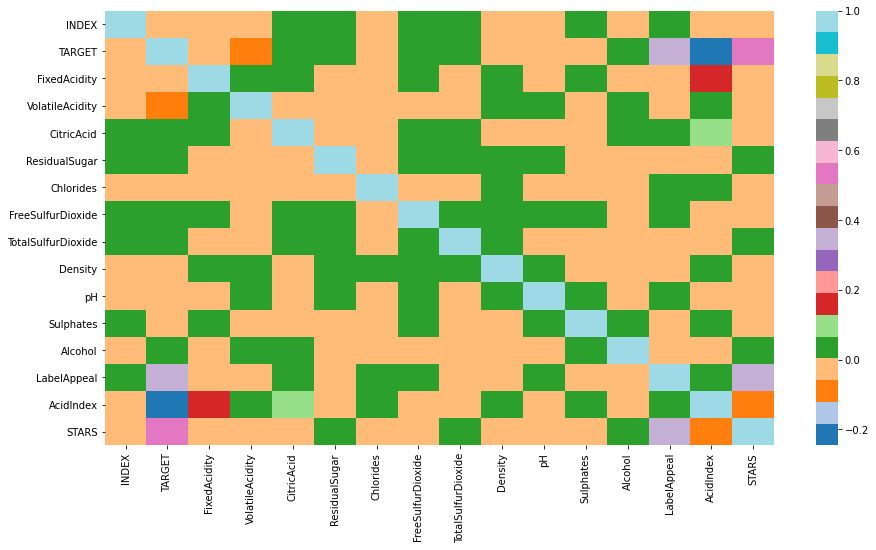

In [14]:
# Heatmap of coorelation between all the attributes
figure(figsize=(15, 8))
print(df.corr())
sns.heatmap(df.corr(),cmap="tab20")

In [15]:
print('There are ' + str(len(df)) + ' observations in this dataset')
print('')
missing = []
for i in df.columns:
    if df[i].isnull().values.any() == True:
        missing.append(df.columns.get_loc(i))
    print(str(i) + ' has ' + str(df[i].isna().sum()) + ' NaN values')

There are 12795 observations in this dataset

INDEX has 0 NaN values
TARGET has 0 NaN values
FixedAcidity has 0 NaN values
VolatileAcidity has 0 NaN values
CitricAcid has 0 NaN values
ResidualSugar has 616 NaN values
Chlorides has 638 NaN values
FreeSulfurDioxide has 647 NaN values
TotalSulfurDioxide has 682 NaN values
Density has 0 NaN values
pH has 395 NaN values
Sulphates has 1210 NaN values
Alcohol has 653 NaN values
LabelAppeal has 0 NaN values
AcidIndex has 0 NaN values
STARS has 3359 NaN values


Below is the EDA for numeric variables:

Index: 
    Index is an attribute indexing each observation. It is not necessary for data analysis, and will be removed in the data preparation section.
    
Target:
    This attribute indicates the number of cases of wine sold. It is a discrete numeric variable with a mean of about 3. A histogram/ bar plot shows a slight right skew, with the mode being 4 cases sold. However, many wines had 0 cases sold, which skews the mean to 3. The boxplot indicates the mean of 3, with an interquartile range of 2-4. 
    
Fixed Acidity:
    This attribute describes the fixed or nonvolatile acid of a wine (does not evaporate). It includes acids such as: tartaric, malic, citric, and succinic. The ranges of acidity each of these acids tend to be: 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid. The histogram the dataframe shows the majority of wines have a fixed acidity of about 7, with a standard deviation of 6.31. Fixed acidity is on a range of [-18.1, 34.3]. The box plot shows a thin interquartile range on [5.2, 9.5], with many outliers. This attribute will require scaling to reflect a more accurate distribution based on domain knowledge.
    
Volatile Acidity:
    This attribute describes the volatile acid content of the wine. It is on the range [-2.79, 3.68], with a mean of 0.32 and standard deviation of 0.78. This attribute is not reliable, the average volatile acid concentration is 400 mg/L with a range of [0, 3 g/L]. This attribute will require feature engineering to correct the distribution. The histogram shows that most wine's volatile acidity falls near its mean. The boxplot shows a thin interquartile range of [0.13, 0.64].
    
Citric Acid:
    Citric Acid content of wine. This attribute has a mean of 0.31. Like other attributes, the histogram shows most of the data falls near the mean. The boxplot shows an interquartile range of [0.03, 0.58]. Similar to other attributes, there are many outliers shown in the boxplot. Citric acid should have a range of 0 - 500 mg/ L, thus this attribute requires scaling and feature engineering.
    
Residual Sugar:
    Residual sugar content of the wine. This attribute has a mean of .05, median of 3.9, standard deviation of 33.7. Like other attributes, this histogram shows most wines have residual sugars near the mean, with outliers on both ends of the histogram. This attribute is not reliable for a couple of reasons: residual sugar cannot be below zero, and residual sugar of wines typical fall between the range of 10 - 35 g / L. The boxplot shows an interquartile range of [-2.0, 15.9], with outliers lying outside the boxplot. 

Chlorides:
    Chloride content of wine. This attribute has a mean of .054, median of .046, standard deviation of 0.32. Like other attributes, the histogram shows most wines having a chloride near the mean, with a few datapoints falling far outside the standard deviation on both ends of the histogram. The boxplot (IQR [-.03, .15]) reflects the histogram, showing outliers falling outside the boxplot. This attribute will have to be scaled so that the minimum chloride level does not fall below 0.
    
Free Sulfur Dioxide:
    Sulfur dioxide content of wine. This has a mean of 30.8, median of 30.0, standard deviation of 148.7. The histogram shows most wines have sulfur dioxide near the mean, with outliers falling far outside the standard deviation on both ends of the histogram. This attribute is not reliable because free sulfur dioxide must be above 0, and typically has a maximum of 79 parts per million. This attribute will have to be feature engineered to fit this scale. The boxplot has and IQR of [0, 70], also showing outliers.

Total Sulfur Dioxide:
    This attribute measures total sulfur dioxide of the wine. This attribute has a mean of 120.7, median of 123, standard deviation of 231.9. The histogram shows outliers far outside the standard deviation on both sides, with most of the data falling near the mean. The boxplot shows an IQR of [27, 208], with outliers falling outside of the boxplot. This attribute will require feature engineering and scaling similar to Free Sulfur Dioxide.
    
Density:
    This attribute has a mean of .99, median of .99, standard deviation of .027. This attribute has outliers, however, based on my domain knowledge, this attribute is reliable. The outliers can be seen in through the boxplot as well. 
    
pH:
    pH is a measure the acidity of wine on a logarithmic scale. In this dataset it has a minimum of .48 and maximum of 6.13. pH is measure on a scale of 0-14, with values less than 7 being acidic. The histogram shows a mean of 3.2. The boxplot shows outliers in this attribute. However, this data looks reliable based on the definition of pH.

Sulphates: 
    Sulphates is a chemical that helps preserve wine. Typically, it has a range of 5 mg/L (5 parts per million) to about 200 mg/L. This dataset shows a range of -3.13 to 4.24. Thus, the data is not reliable and requires scaling / feature engineering. The histogram shows a mean of .527. The boxplot shows outliers in this attribute that will be removed in the feature engineering.
    
Alcohol:
    This attribute seems to be in the unit of percent alcohol (ABV). It is similar to typical range of wine 15.5% to 25% ABV, with an average of 18%. However, this dataset has negative alcohol ABV values which must be taken into account in the feature engineering (seen in the histogram). The boxplot shows there are outliers in the alcohol attribute.
    

    


In [16]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


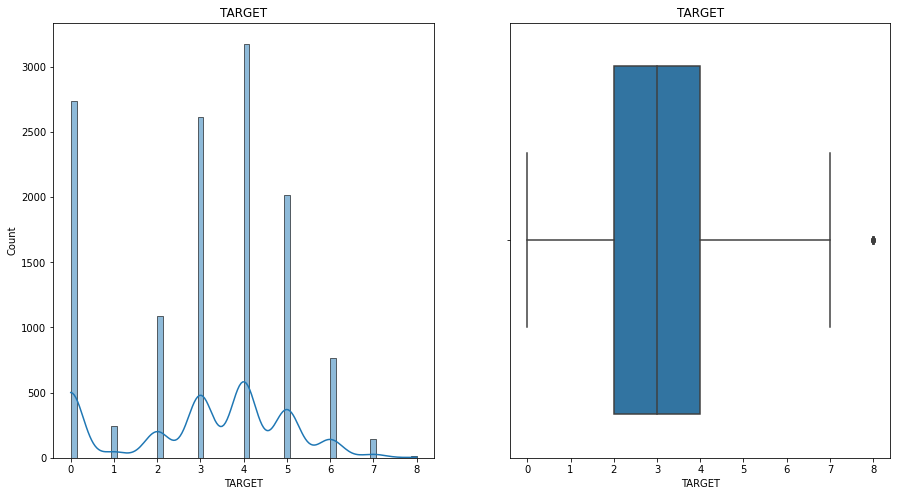

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


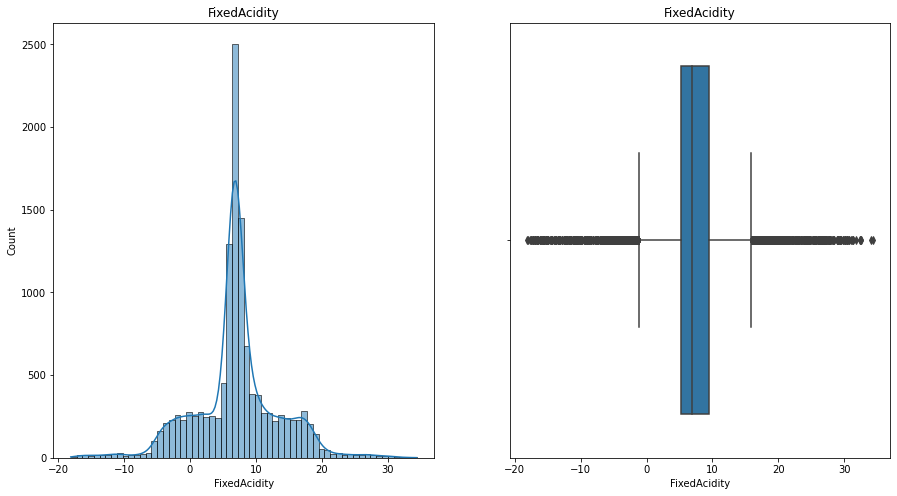

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


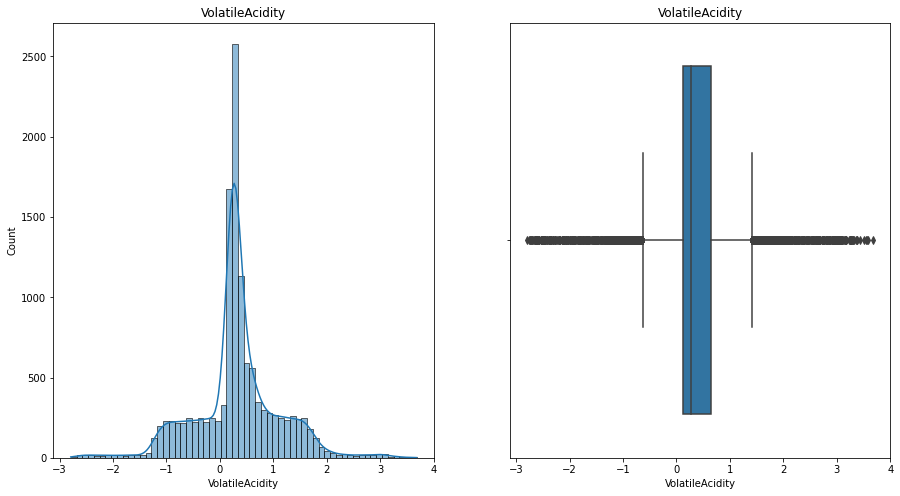

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


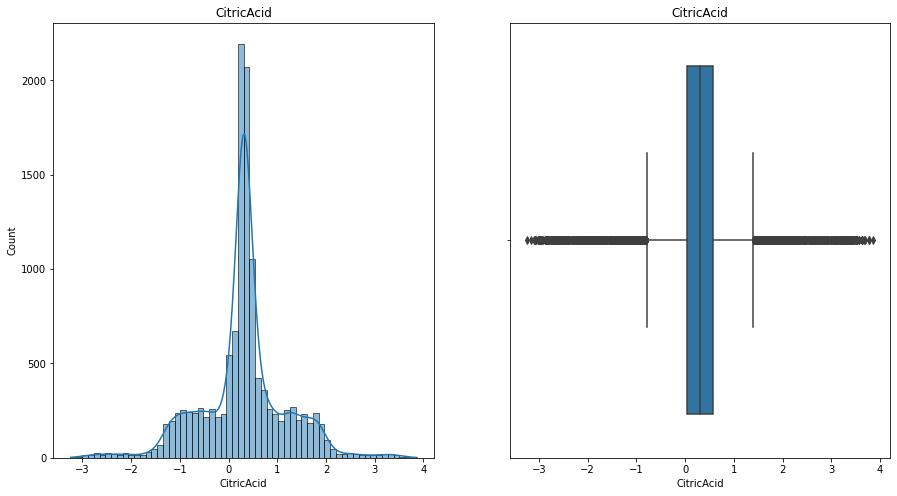

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


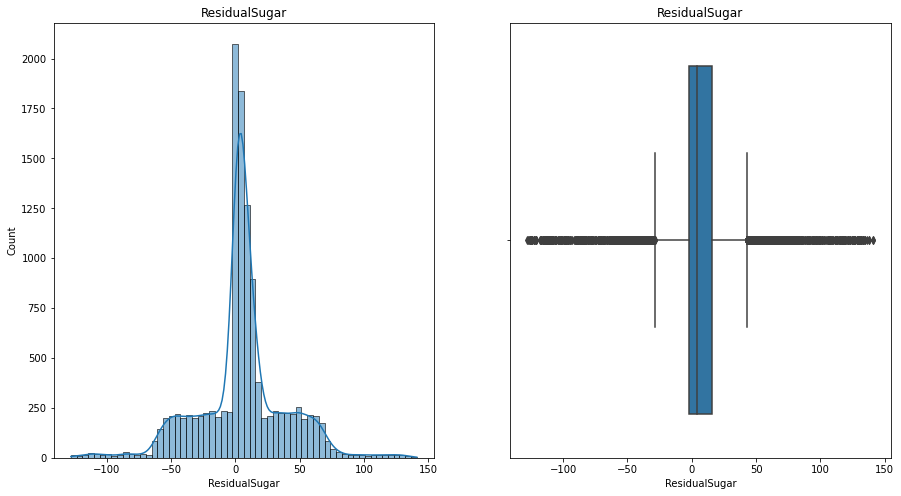

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


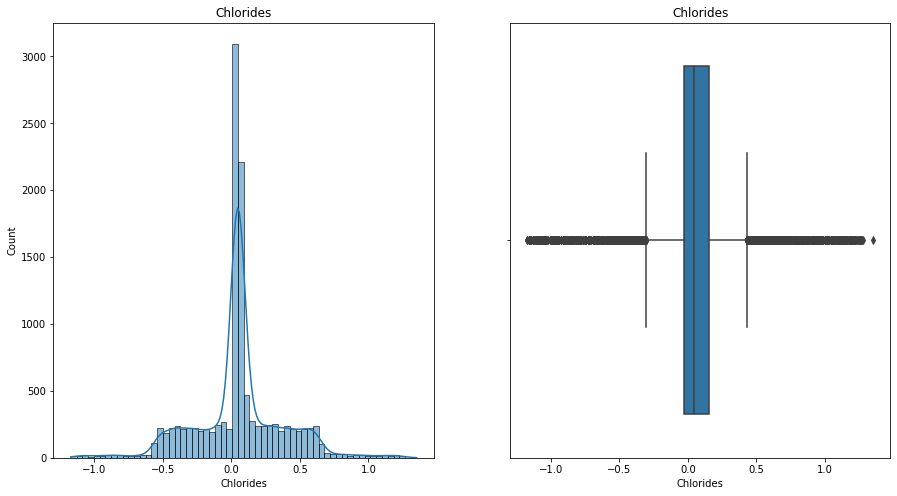

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


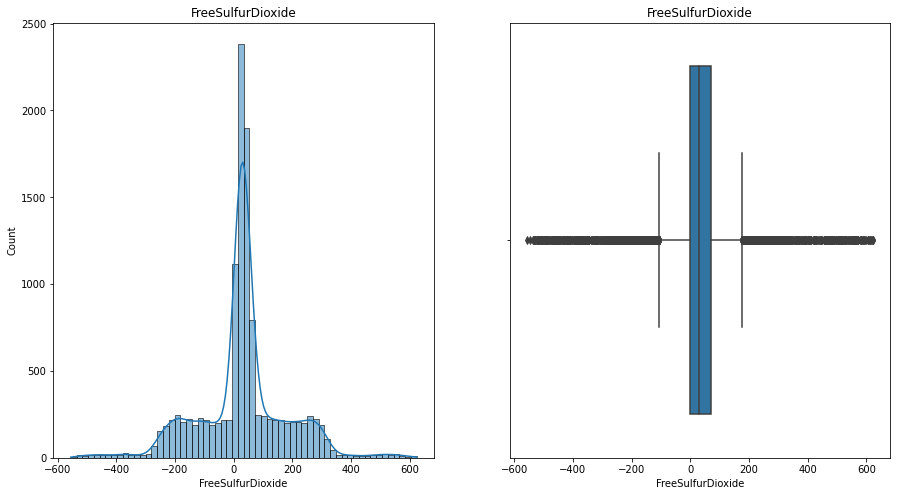

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


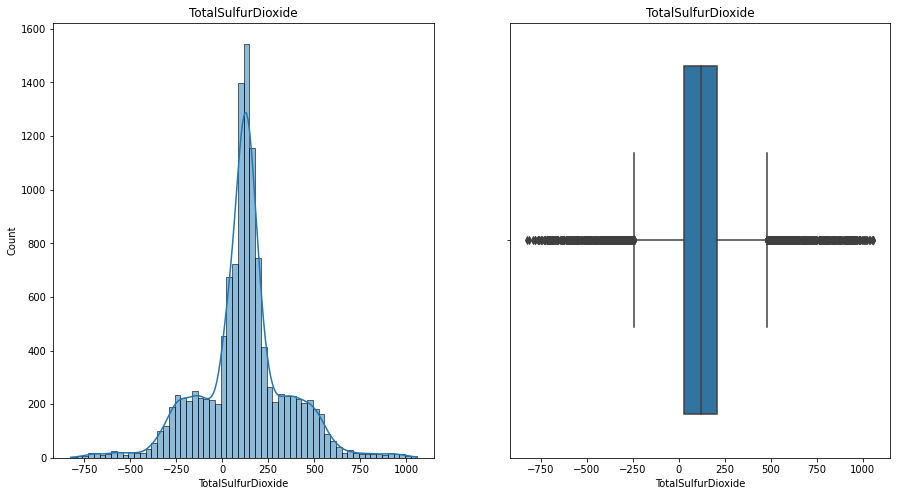

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


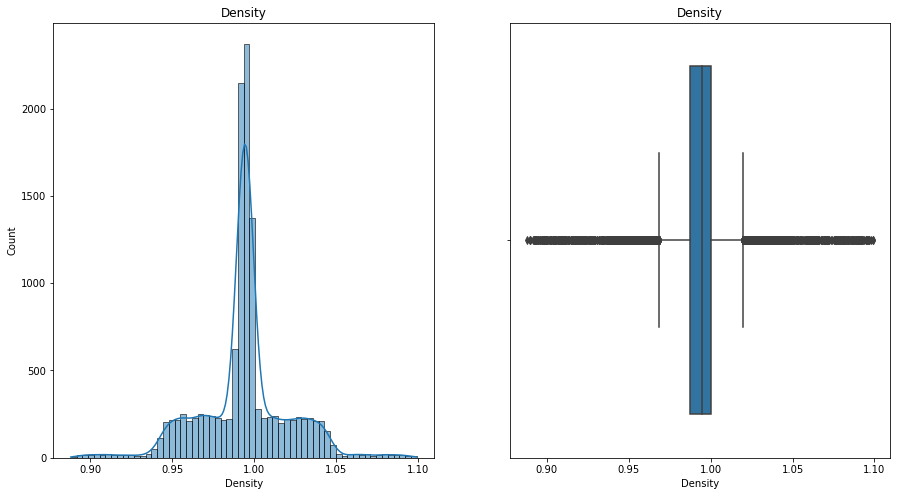

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


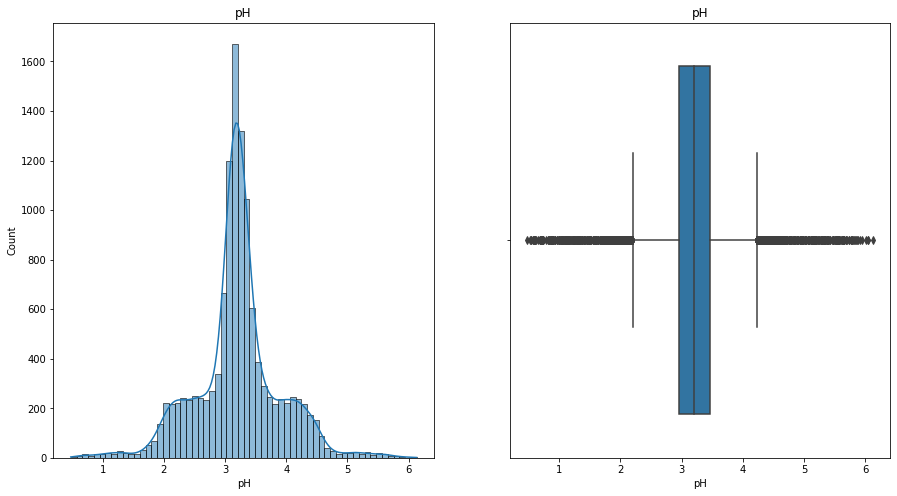

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


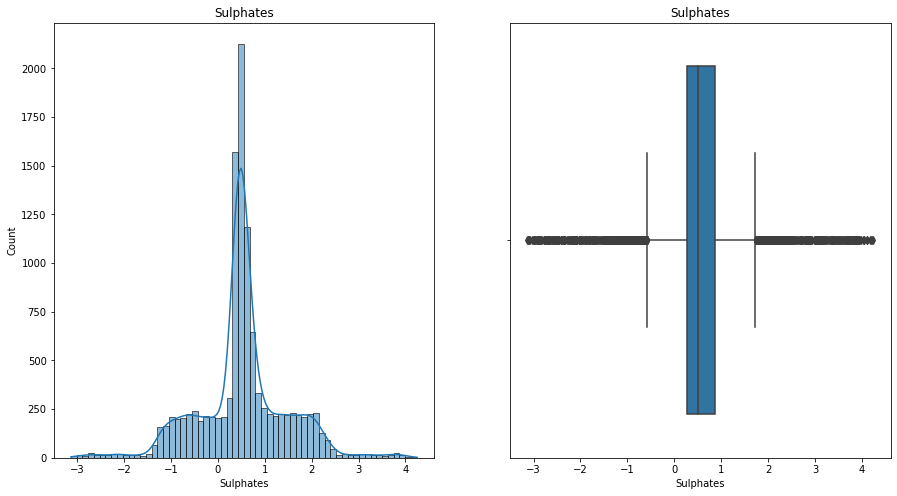

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


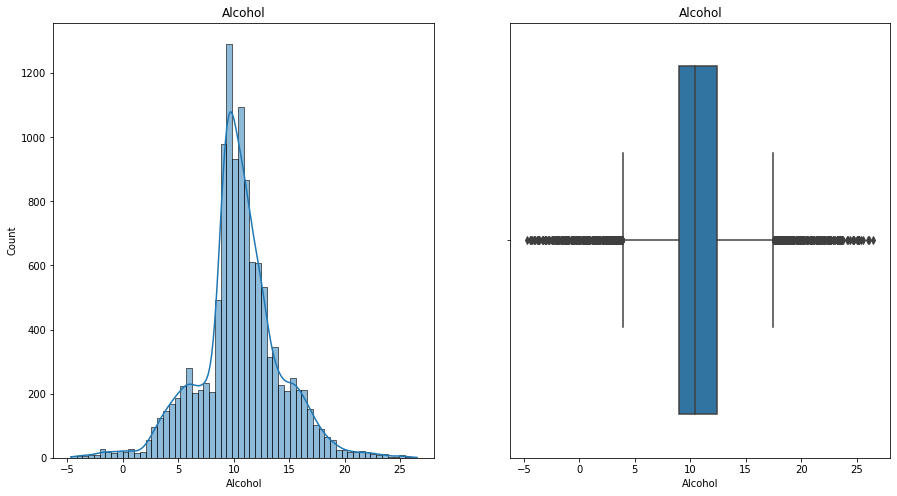

In [17]:
# plotting numeric variables
for i in range(1,13):
    figure(figsize=(15, 8))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df.iloc[:,i], bins = 60, kde = True)
    plt.title(df.columns[i])
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

### Label Appeal

Label appeal is a nominal categorical variable. It measures how nice the label of the wine is, with 0 being average, negative being poor and positive being good. The bar plot shows most wines have a 0 label appeal.

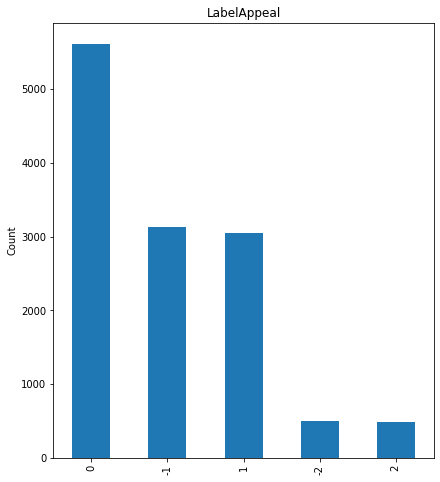

In [18]:
# plot label appeal
figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
df.iloc[:,13].value_counts().plot.bar()
plt.title(df.columns[13])
plt.ylabel('Count')
plt.show()

### Acid Index

This attribute measures the total acidity of wine via a weighted average. The histogram is skew right. The boxplot shows there are outliers in acid index.

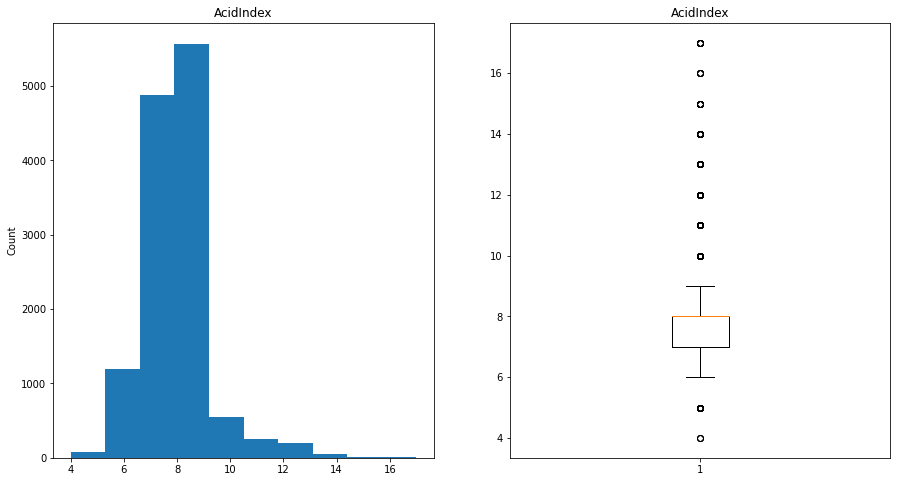

In [19]:
# plot acid index
figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.hist(df.iloc[:,14])
plt.title(df.columns[14])
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.boxplot(df.iloc[:,14])
plt.title(df.columns[14])
plt.show()

### STARS

This attribute is a wine rating determined by experts. 4= excellent and 1 = poor. The most common STARS rating is 2, with about 3500 observations.

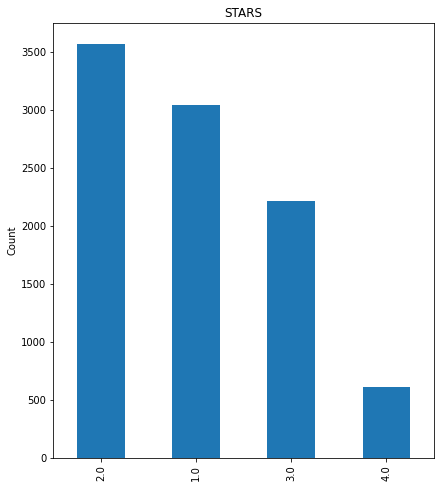

In [20]:
figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
df.iloc[:,15].value_counts().plot.bar()
plt.title(df.columns[15])
plt.ylabel('Count')
plt.show()

## Data Preparation

The first step in the data preparation is to translate any attributes which make no sense as negative values. I translate each attribute by the minimum of the attribute, so the minimum is now 0. Next, I remove outliers greater or less than 2.5 standard deviations from the mean. Next, I create dummy variables for the STARS attribute, so that there are no Nan values anymore. Doing this allows a machine learning algorithm to perform better, since ML algorithms may not work with Nan values. Finally, I drop Nan values, which show to not change the pdf's of the distributions (see next section).

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M3_Data.csv")

In [22]:
df2 = df

In [23]:
# Translate each of the attributes which dont make sense because they have negative values
# Translate so that the minimum of each of them is 0
df2['FixedAcidity'] = df2['FixedAcidity'] - min(df2['FixedAcidity'])
df2['VolatileAcidity'] = df2['VolatileAcidity'] - min(df2['VolatileAcidity'])
df2['CitricAcid'] = df2['CitricAcid'] - min(df2['CitricAcid'])
df2['ResidualSugar'] = df2['ResidualSugar'] - min(df2['ResidualSugar'])
df2['Chlorides'] = df2['Chlorides'] - min(df2['Chlorides'])
df2['FreeSulfurDioxide'] = df2['FreeSulfurDioxide'] - min(df2[df2['FreeSulfurDioxide'].notnull()].FreeSulfurDioxide)
df2['TotalSulfurDioxide'] = df2['TotalSulfurDioxide'] - min(df2['TotalSulfurDioxide'])
df2['Sulphates'] = df2['Sulphates'] - min(df2['Sulphates'])
df2['Alcohol'] = df2['Alcohol'] - min(df2['Alcohol'])

# Reassign dataframe df
# The above code was altering df and I don't know why, so I reassign it here with the original values
df = pd.read_csv("https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M3_Data.csv")

# Identify outliers of all the attributes I determined needs outlier preparation
fa = df2[np.abs(df2['FixedAcidity'] - df2['FixedAcidity'].mean() ) > (2.5 * df2['FixedAcidity'].std() )]
va = df2[np.abs(df2['VolatileAcidity'] - df2['VolatileAcidity'].mean() ) > (2.5 * df2['VolatileAcidity'].std() )]
ca = df2[np.abs(df2['CitricAcid'] - df2['CitricAcid'].mean() ) > (2.5 * df2['CitricAcid'].std() )]
rs = df2[np.abs(df2['ResidualSugar'] - df2['ResidualSugar'].mean() ) > (2.5 * df2['ResidualSugar'].std() )]
cl = df2[np.abs(df2['Chlorides'] - df2['Chlorides'].mean() ) > (2.5 * df2['Chlorides'].std() )]
fsd = df2[np.abs(df2['FreeSulfurDioxide'] - df2['FreeSulfurDioxide'].mean() ) > (2.5 * df2['FreeSulfurDioxide'].std() )]
tsd = df2[np.abs(df2['TotalSulfurDioxide'] - df2['TotalSulfurDioxide'].mean() ) > (2.5 * df2['TotalSulfurDioxide'].std() )]
su = df2[np.abs(df2['Sulphates'] - df2['Sulphates'].mean() ) > (2.5 * df2['Sulphates'].std() )]
den = df2[np.abs(df2['Density'] - df2['Density'].mean() ) > (2.5 * df2['Density'].std() )]
ph = df2[np.abs(df2['pH'] - df2['pH'].mean() ) > (2.5 * df2['pH'].std() )]
alc = df2[np.abs(df2['Alcohol'] - df2['Alcohol'].mean() ) > (2.5 * df2['Alcohol'].std() )]

# Create a dataframe of all outliers (includes duplicates)
outliers = []
outliers = pd.concat([fa, va, ca, rs, cl, fsd, tsd, su, den, ph, alc]) 

# Remove duplicates
outliers = outliers.drop_duplicates()
outliers

# Create a dataframe of the dataset with the outlier observations removed
df2NoOut = df2.drop(outliers.index.values)

# Reset index of dataframe
df2NoOut = df2NoOut.reset_index()

# Create dummy variables for STAR attribute
# This can now be used for a machine learning model, now that there are no Nan values
STAR1 = []
STAR2 = []
STAR3 = []
STAR4 = []
for value in df2NoOut.STARS.values:
    if value == 1.0:
        STAR1.append(1)
        STAR2.append(0)
        STAR3.append(0)
        STAR4.append(0)
    elif value == 2.0:
        STAR1.append(0)
        STAR2.append(1)
        STAR3.append(0)
        STAR4.append(0)
    elif value == 3.0:
        STAR1.append(0)
        STAR2.append(0)
        STAR3.append(1)
        STAR4.append(0)
    elif value == 4.0:
        STAR1.append(0)
        STAR2.append(0)
        STAR3.append(0)
        STAR4.append(1)
    else:
        STAR1.append(0)
        STAR2.append(0)
        STAR3.append(0)
        STAR4.append(0)

# Print length of each list to make sure it's correct
print(len(STAR1))
print(len(STAR2))
print(len(STAR3))
print(len(STAR4))

# Add columns of Star dummy variables to dataframe
df2NoOut['Star 1'] = STAR1
df2NoOut['Star 2'] = STAR2
df2NoOut['Star 3'] = STAR3
df2NoOut['Star 4'] = STAR4

# Delete Stars attribute (which has Nan values)
del df2NoOut['STARS']
# Delete index columns being that they're unnecessary
del df2NoOut['index']
del df2NoOut['INDEX']

# Drop Nan values
df2NoOut = df2NoOut.dropna()

df2NoOut.head()

9588
9588
9588
9588


,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Star 1,Star 2,Star 3,Star 4
2,3,23.8,3.175,3.28,146.6,0.746,577.0,938.0,0.99640,2.24,4.96,10.9,-1,6,1,0,0,0
4,0,29.4,3.110,3.83,130.0,1.727,518.0,838.0,0.99940,3.20,4.42,20.1,0,11,0,0,0,0
5,0,25.8,3.080,2.84,149.3,1.231,842.0,979.0,0.99572,3.49,4.34,15.0,0,8,0,0,0,0
6,6,23.6,2.570,3.63,129.6,0.894,617.0,1003.0,0.94724,3.09,3.88,17.3,0,8,0,0,0,1
8,3,24.1,3.120,2.18,130.8,1.689,560.0,1201.0,0.96643,3.55,2.27,8.6,1,7,0,1,0,0


In [24]:
# Make sure there are no Nan values
print('There are ' + str(len(df2NoOut)) + ' observations in this dataset')
print('')
missing = []
for i in df2NoOut.columns:
    if df2NoOut[i].isnull().values.any() == True:
        missing.append(df2NoOut.columns.get_loc(i))
    print(str(i) + ' has ' + str(df2NoOut[i].isna().sum()) + ' NaN values')

There are 6459 observations in this dataset

TARGET has 0 NaN values
FixedAcidity has 0 NaN values
VolatileAcidity has 0 NaN values
CitricAcid has 0 NaN values
ResidualSugar has 0 NaN values
Chlorides has 0 NaN values
FreeSulfurDioxide has 0 NaN values
TotalSulfurDioxide has 0 NaN values
Density has 0 NaN values
pH has 0 NaN values
Sulphates has 0 NaN values
Alcohol has 0 NaN values
LabelAppeal has 0 NaN values
AcidIndex has 0 NaN values
Star 1 has 0 NaN values
Star 2 has 0 NaN values
Star 3 has 0 NaN values
Star 4 has 0 NaN values


### Prepped Data Review

The distribution of the prepared data looks better than the original data. There are no extreme outliers, and the pdf's of the distributions look very similar. Note that the deletion of Nan values did not affect the pdf of the distributions. Furthermore, attributes that didn't make sense with negative values now do make sense with the shifted data (see data preparation section above).


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


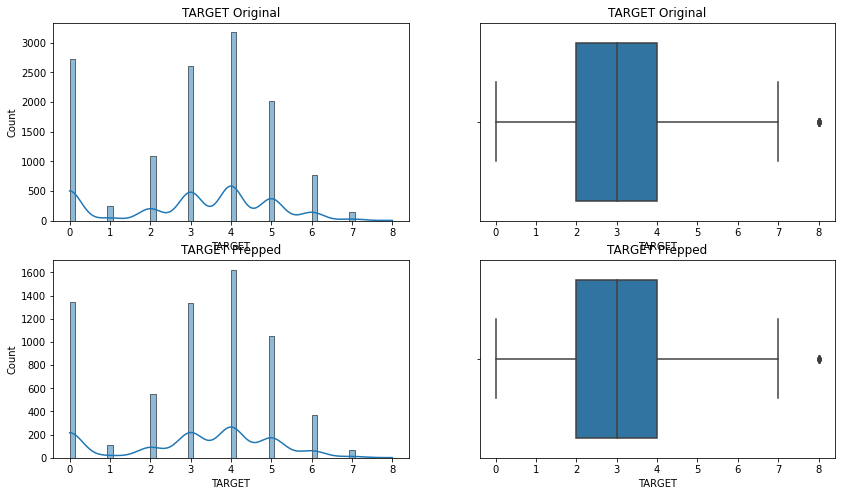

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


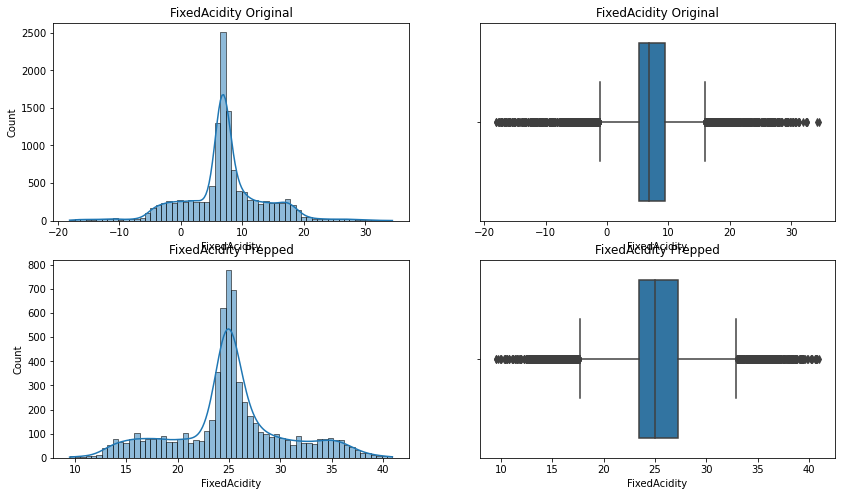

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


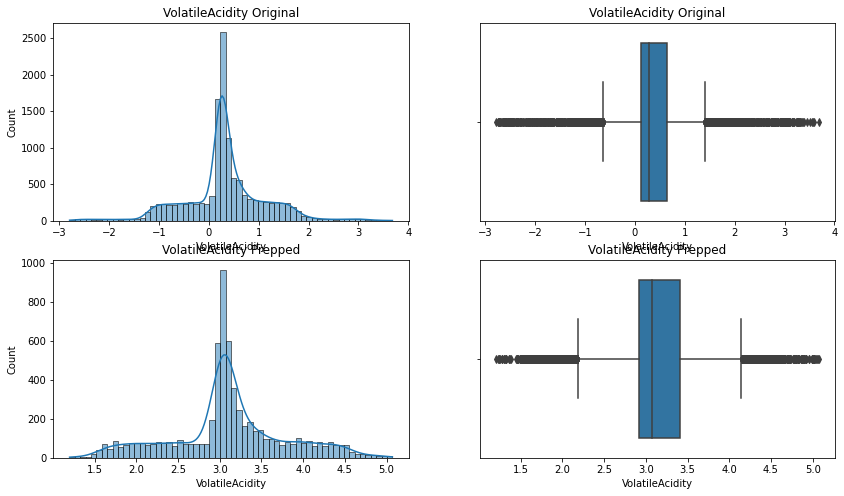

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


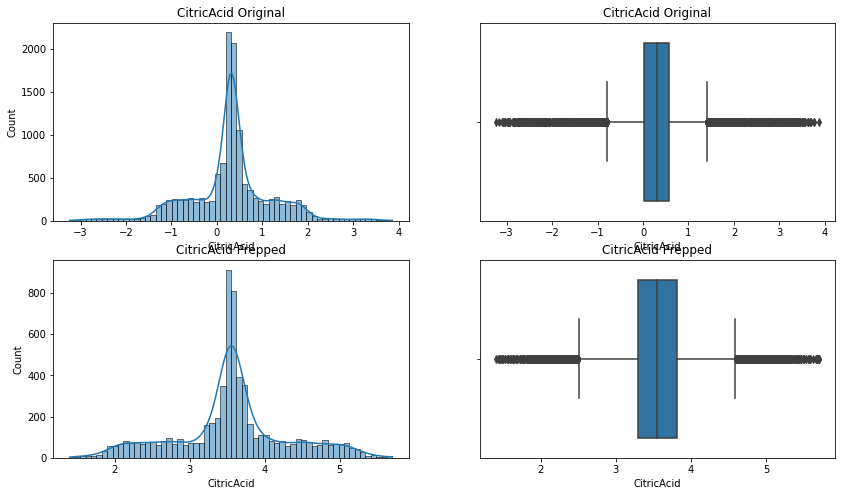

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


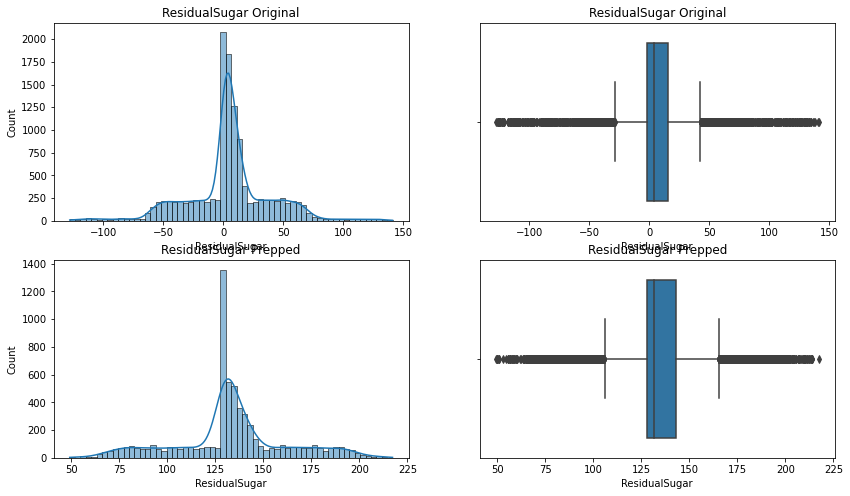

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


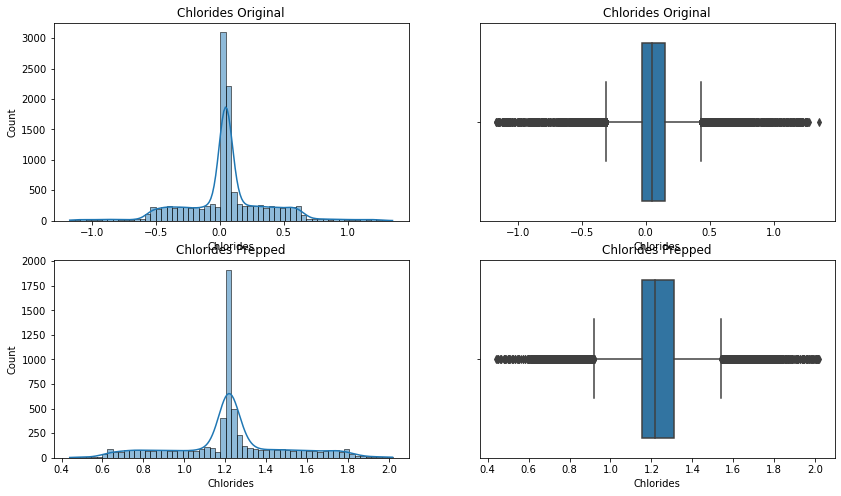

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


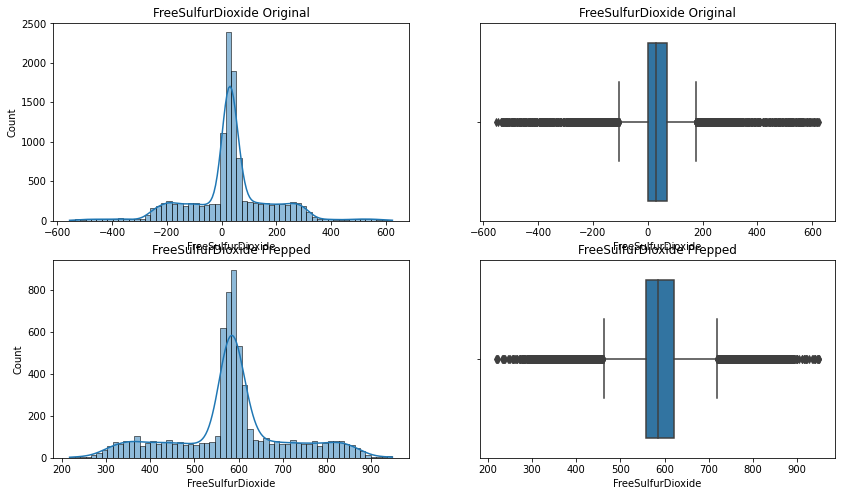

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


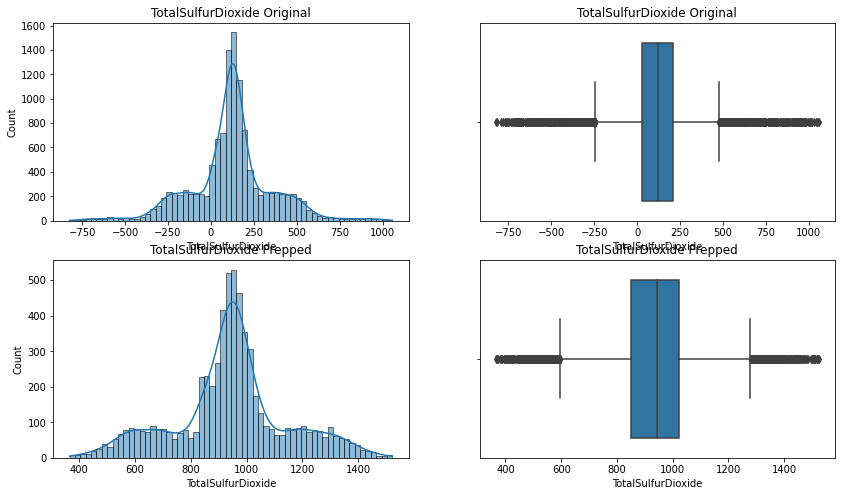

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


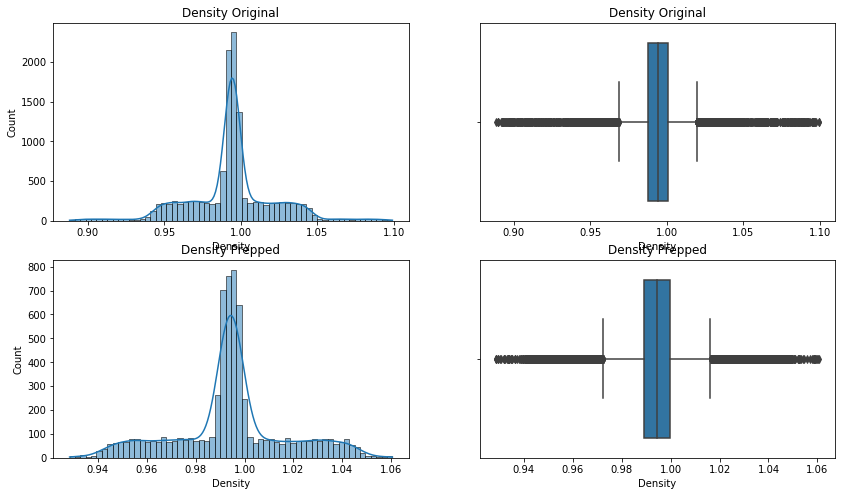

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


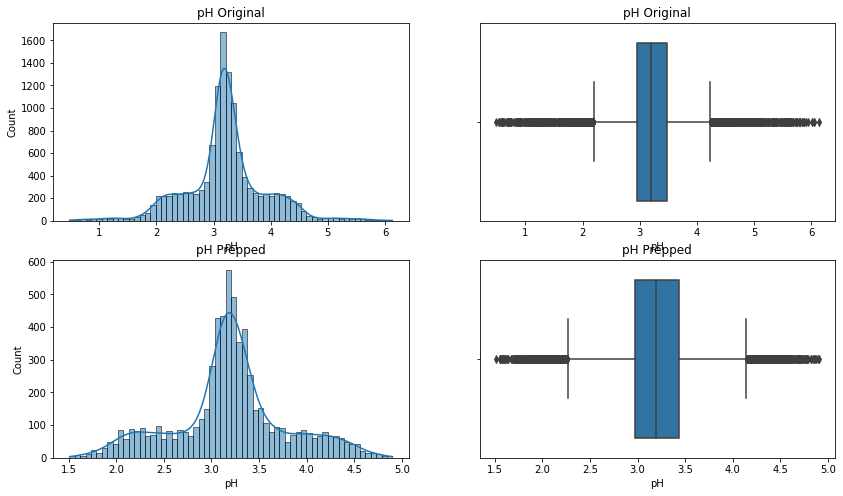

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


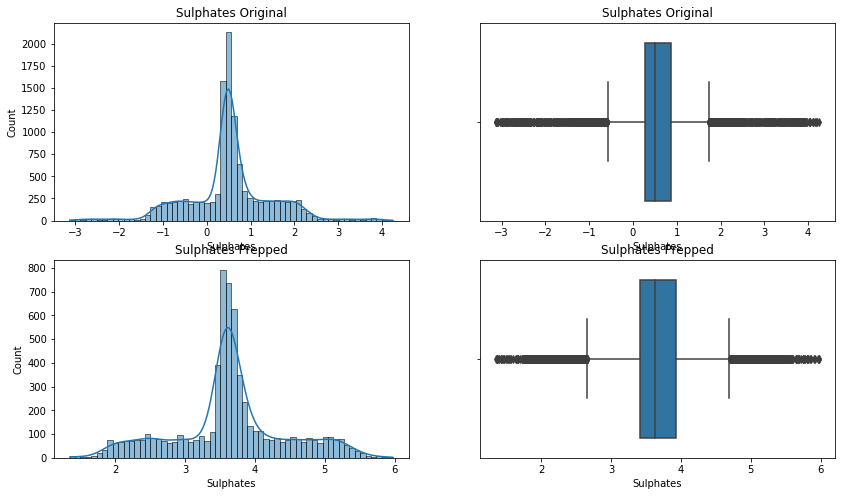

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


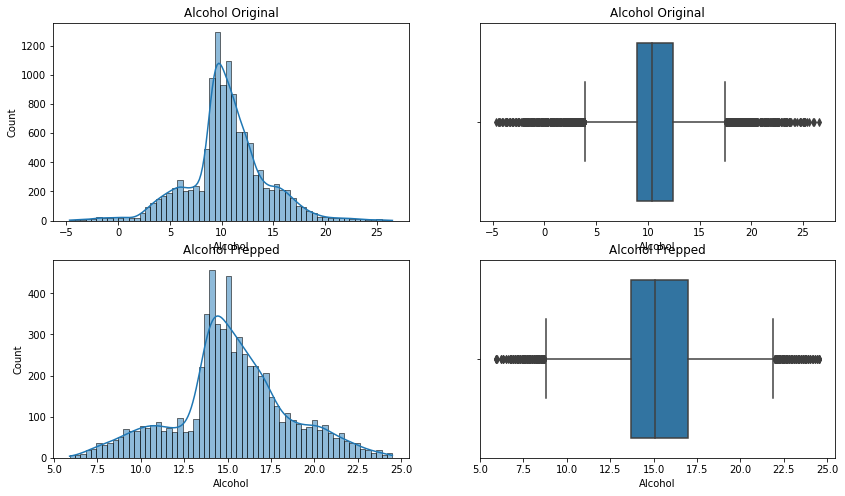

In [25]:
# Plot original and prepped numeric variables
for i in range(1,13):
    figure(figsize=(14, 8))
    
    plt.subplot(2, 2, 1)
    sns.histplot(df.iloc[:,i], bins = 60, kde = True)
    plt.title(str(df.columns[i]) + ' Original') 
    plt.ylabel('Count')

    plt.subplot(2, 2, 2)
    sns.boxplot(df.iloc[:,i])
    plt.title(str(df.columns[i]) + ' Original')
    
    plt.subplot(2, 2, 3)
    sns.histplot(df2NoOut.iloc[:,i-1], bins = 60, kde = True)
    plt.title(str(df2NoOut.columns[i-1]) + ' Prepped')
    plt.ylabel('Count')

    plt.subplot(2, 2, 4)
    sns.boxplot(df2NoOut.iloc[:,i-1])
    plt.title(str(df2NoOut.columns[i-1]) +' Prepped')
    plt.show()

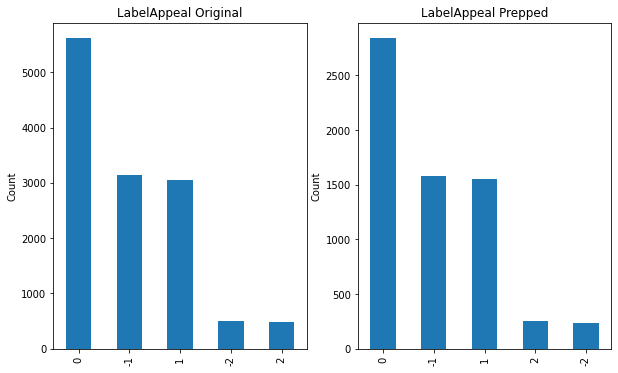

In [26]:
# plot original and prepped label appeal
figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.iloc[:,13].value_counts().plot.bar()
plt.title(str(df.columns[13]) + ' Original')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df2NoOut.iloc[:,12].value_counts().plot.bar()
plt.title(str(df2NoOut.columns[12]) + ' Prepped')
plt.ylabel('Count')
plt.show()

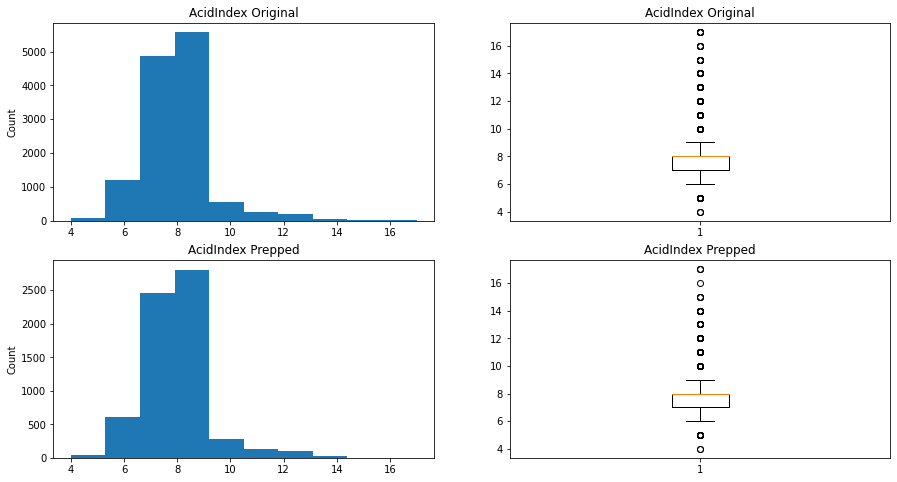

In [27]:
# plot original and prepped acid index
figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.hist(df.iloc[:,14])
plt.title(str(df.columns[14]) + ' Original')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.boxplot(df.iloc[:,14])
plt.title(str(df.columns[14]) + ' Original')

plt.subplot(2, 2, 3)
plt.hist(df2NoOut.iloc[:,13])
plt.title(str(df2NoOut.columns[13]) + ' Prepped')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.boxplot(df2NoOut.iloc[:,13])
plt.title(str(df2NoOut.columns[13]) + ' Prepped')
plt.show()


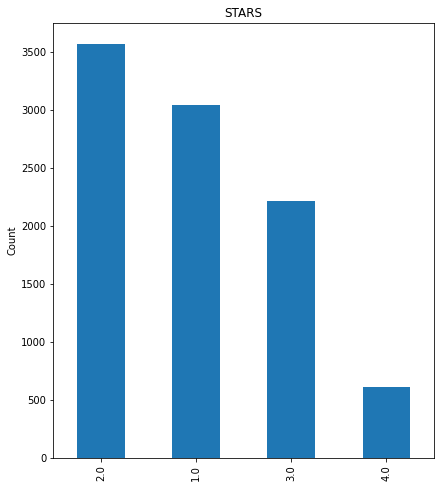

In [28]:
# plot original stars (stars hasn't been changed during the data preparation)
figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
df.iloc[:,15].value_counts().plot.bar()
plt.title(df.columns[15])
plt.ylabel('Count')
plt.show()

# Conclusion

The task of the assignment was to clean a messy wine dataset. The dataset was given with multiple integrity issues such as: negative values where it doesn't make sense, extreme outliers, and missing values. The data was cleaned by translating data points to where they're more appropriate, removing outliers, removing Nan values, and creating a dummy variables for an ordinal categorial variable (STARS). Overall, the data preparation improved the data integrity, and did not heavily change the pdf of the distributions.